In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 pixel 0-9 hoordoh garaar bichsen too

(x_train, y_train), (x_test, y_test) = mnist.load_data()   #0-9 toog oruulj bn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())   
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   # 0 - 9 too uchir ur dun n 10 utga garna


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2591 - accuracy: 0.9240
Epoch 2/3
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1033 - accuracy: 0.9683
Epoch 3/3
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0701 - accuracy: 0.9772


In [25]:
print(x_train.shape)

(60000, 28, 28)


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Aldaa:',val_loss)
print('Huvi:',val_acc)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Aldaa: 0.10272606176007539
Huvi: 0.9685


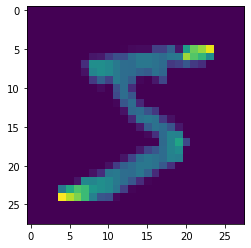

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()
print(x_train[0])

In [ ]:
model.save('num_reader.model')

In [ ]:
new_model= tf.keras.models.load_model('epic_num_reader.model')

In [9]:
predictions = model.predict(x_test)
print(predictions)

[[2.33060398e-08 9.59034963e-10 1.24302614e-05 ... 9.99631166e-01
  1.72454833e-07 1.27702242e-05]
 [1.18722414e-06 6.89288019e-04 9.98259723e-01 ... 3.46430315e-11
  9.27706424e-06 6.30958133e-11]
 [4.81684992e-07 9.97979462e-01 1.49076324e-04 ... 3.28796559e-05
  1.06531673e-03 4.79933362e-07]
 ...
 [2.64660009e-08 6.17928748e-08 1.82302387e-07 ... 3.66010354e-05
  1.37026378e-04 3.02127493e-03]
 [4.36507798e-05 7.31327827e-06 1.08374525e-05 ... 2.08939582e-05
  1.25052640e-03 4.86688464e-07]
 [1.71561478e-04 2.63325961e-09 1.00778205e-04 ... 1.00786934e-08
  4.81348138e-07 3.21529896e-08]]


In [23]:
import numpy as np

print(np.argmax(predictions[0]) , np.argmax(predictions[23]))

7 5


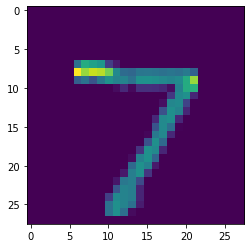

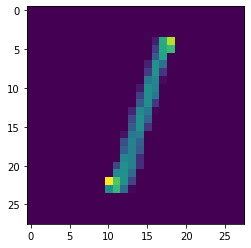

In [17]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [27]:
print(img_array.shape[:2])

(354, 420)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import io
from google.cloud import vision_v1p3beta1 as vision
from datetime import datetime

DATADIR = "F:/BD/test"


    
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'client_key.json'

def recognize_license_plate(img_path):

    start_time = datetime.now()

    
    img_array = cv2.imread(os.path.join(img_path))
    

    # Get image size
    height= 354
    width = 420

    # Scale image
    img_array = cv2.resize(img, (800, int((height * 800) / width)))

    # Show the origin image
    cv2.imshow('Origin image', img_array)

    # Save the image to temp file
    cv2.imwrite(SOURCE_PATH + "output.jpg", img_array)

    # Create new img path for google vision
    img_path = SOURCE_PATH + "output.jpg"

    # Create google vision client
    client = vision.ImageAnnotatorClient()

    # Read image file
    with io.open(img_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    # Recognize text
    response = client.text_detection(image=image)
    texts = response.text_annotations

    for text in texts:
        if len(text.description) == 10:
            license_plate = text.description
            print(license_plate)
            vertices = [(vertex.x, vertex.y)
                        for vertex in text.bounding_poly.vertices]

            # Put text license plate number to image
            cv2.putText(img, license_plate, (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

            print(vertices)
            # Draw rectangle around license plate
            cv2.rectangle(img, (vertices[0][0]-10, vertices[0][1]-10), (vertices[2][0]+10, vertices[2][1]+10), (0, 255, 0), 3)
            print('Total time: {}'.format(datetime.now() - start_time))
            cv2.imshow('Recognize & Draw', img_array)
            cv2.waitKey(0)

In [57]:
path = DATADIR + '1.jpg'
recognize_license_plate(path)

TypeError: Expected Ptr<cv::UMat> for argument '%s'

354
420


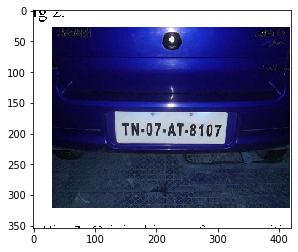

In [53]:
print(img_array.shape[0])
height= img_array.shape[1]
print(height)
plt.imshow(img_array)
plt.show()